# Unraveling the Relationship: An In-depth Analysis of BMI and Diabetes Prevalence using Confidence Intervals and Hypothesis Testing


# Introduction:

## Why is this important?

Diabetes is a complex chronic condition that inhibits many challenges to global health. It is characterized by the body’s inability to effectively manage blood glucose levels, which in result can lead to prolonged hyperglycemia. This effect alone posses multitudes of damage including, cardiovascular disease, kidney damage, vision loss, and neuropathy. The knowledge of managing and understanding the levels of blood glucose levels can drastically affect the outcome of someones health with or without diabetes. We know obesity are linked to many diseases, but does obesity and diabetes have a relationship? For our project goal, we want to compare the `BMI` (Body Mass Index) levels of patients across two categories (individuals with diabetes and individuals without diabetes) to determine if the BMI of individuals across the two categories differs siginificantly. 


#### Random Variables of Interest:
- Body Mass Index (kg/m^2)
#### Categories for Comparison:
- Individuals diagnosed with diabetes
- Individuals without diabetes


### The Dataset
The dataset we will use to explore this question is sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. It consists of 768 samples of female above 21 years old of Pima Indian heritage. The dataset includes eight attributes plus the target variable (Outcome) : 

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Since our random variable of interest is the BMI, we will drop all other features from the dataset. 


### Location Parameter:

We have chosen the mean BMI as the location parameter due to its direct relevance in diagnosing and managing diabetes. Elevated average levels of bmi are linked to many diseases, making the mean a crucial measure to assess and compare between groups.

### Scale Parameter:


The standard deviation is selected as the scale parameter for bmi, as it quantifies the spread of bmi readings within each group. We can find out the variability of bmi with people with diabetes and people with no diabetes to compare the spread of each category.  



# WE NEED TO PUT REFRENCE TO BACKUP OUR STATEMENT


# Preliminary Results

In [2]:
library(tidyverse)
library(repr)
library(infer)
library(ggplot2) 
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [10]:
#Our diabetes sample

diabetes_data <- read_csv("/data/diabetes.csv")
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


# Procedure:

Firstly, we are going to create two bootstrap distributions for the BMI for patients with diabetes and patients with no diabetes. We will visualize using histogram to see if the sample mean distributions "significantly" overlap. If they don't overlap, this may suggest that there is a relationship between a person's BMI and them being diabetic.

In [21]:
# We are going to split the data into 2 different analysis. One will be patients with diabetes, 
# and the other will be patiens with no diabetes

diabetes_positive <- diabetes_data |>
filter(!is.na(BMI) & Outcome == 1) |>
select(BMI, Outcome)

diabetes_negative <- diabetes_data |>
filter(!is.na(BMI) & Outcome == 0) |>
select(BMI, Outcome)

# data for all patients with diabetes
head(diabetes_positive)
# data for all patients with no diabetes
head(diabetes_negative)

BMI,Outcome
<dbl>,<dbl>
33.6,1
23.3,1
43.1,1
31.0,1
30.5,1
0.0,1


BMI,Outcome
<dbl>,<dbl>
26.6,0
28.1,0
25.6,0
35.3,0
37.6,0
27.1,0


### Generate Bootstrap Distributions for Positive and Negative Classes

In [27]:
set.seed(1234)

# Calculating Bootstrap for positive diabetic patients and negative diabetic patients

# The number of positive diabetic patients in our sample (we will be using 4000 reps for accuracy)
diabetes_positive_bootstrap_dist <- diabetes_positive |>
specify(response = BMI)|>
generate(type = "bootstrap", reps = 4000) |>
calculate(stat = "mean")


# The number of negative diabetic patients in our sample (we will be using 4000 reps for accuracy)
diabetes_negative_bootstrap_dist <- diabetes_negative |>
specify(response = BMI) |>
generate(type = "bootstrap", reps = 4000) |>
calculate(stat = "mean")

head(diabetes_positive_bootstrap_dist)
head(diabetes_negative_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,34.76828
2,34.71679
3,34.64515
4,35.18433
5,36.22313
6,34.89216


replicate,stat
<int>,<dbl>
1,30.1888
2,29.7176
3,29.9538
4,30.1112
5,29.8544
6,30.3984


### Creating a summary data frame to collate results for both positive and negative cases:

In [36]:
positive_mean = mean(diabetes_positive_bootstrap_dist$stat)
positive_std_error = sd(diabetes_positive_bootstrap_dist$stat) / sqrt(nrow(diabetes_positive_bootstrap_dist))
negative_mean = mean(diabetes_negative_bootstrap_dist$stat)
negative_std_error = sd(diabetes_negative_bootstrap_dist$stat) / sqrt(nrow(diabetes_negative_bootstrap_dist))

diabetes_summary <- data.frame(
    diabetic = c("Positive", "Negative"),
    mean = c(positive_mean, negative_mean),
    std_error = c(positive_std_error, negative_std_error)
    
)

diabetes_summary

diabetic,mean,std_error
<chr>,<dbl>,<dbl>
Positive,35.15114,0.006948639
Negative,30.30548,0.005341457


### Visualization:

In [31]:
# Create histogram for diabetes positive bootstrapping distrubtion

diabetes_positive_bootstrap_dist_visual <- diabetes_positive_bootstrap_dist %>%
  ggplot(aes(x = stat)) +
  geom_histogram(bins = 30, fill = "#69b3a2", color = "white") +
  theme_bw() +
  labs(
    x = "Means of BMI (Kg/m^2)",
    y = "Frequency",
    title = "Bootstrap Sample Means of BMI Level of Positive Diabetic Patients"
  ) +    geom_vline(xintercept = positive_mean,
               size = 2,
               colour = "yellow") + 
  theme(
    text = element_text(size = 18),
    axis.title = element_text(size = 20, face = "bold"),
    title = element_text(size = 10, face = "bold"),
    plot.background = element_rect(fill = "floralwhite"),
    panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "lightgray"),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 15)
  )

In [32]:
# Create histogram for negative diabetes bootstrapping distrubtion

diabetes_negative_bootstrap_dist_visual <- diabetes_negative_bootstrap_dist %>%
  ggplot(aes(x = stat)) +
  geom_histogram(bins = 30, fill = "#69b3a2", color = "white") +
  theme_bw() +
  labs(
    x = "Means of BMI Level (Kg/m^2)",
    y = "Frequency",
    title = "Bootstrap Sample Means of BMI Level of Negative Diabetic Patients"
  ) +  geom_vline(xintercept = negative_mean,
               size = 2,
               colour = "yellow") + 
  theme(
    text = element_text(size = 18),
    axis.title = element_text(size = 20, face = "bold"),
    title = element_text(size = 10, face = "bold"),
    plot.background = element_rect(fill = "floralwhite"),
    panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "lightgray"),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 15)
  )

### Positive diabetic patients and negative diabetic patients bootstrapping distrubutions side by side

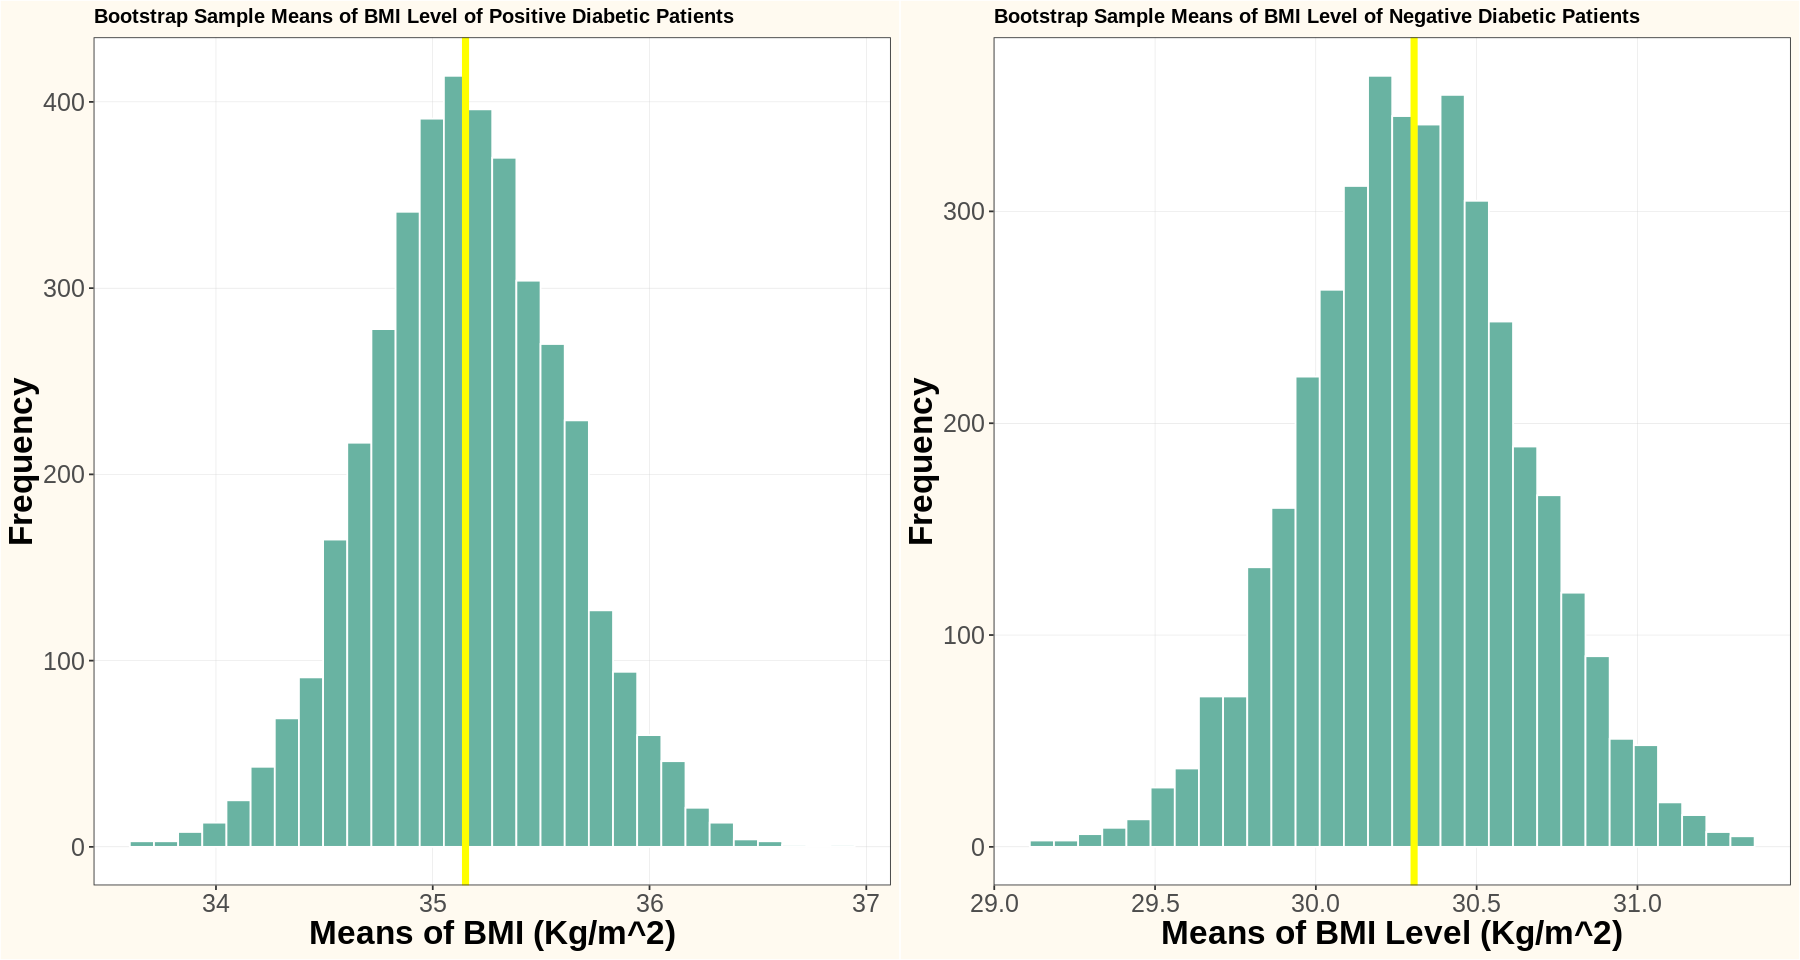

In [33]:
#Have to fix the title axis and title glitch
options(repr.plot.width=15, repr.plot.height=8)

grid.arrange(diabetes_positive_bootstrap_dist_visual, diabetes_negative_bootstrap_dist_visual, ncol = 2)

### Comparing the vairance of Positive diabetic patients and negative diabetic patients bootstrapping distrubutions:

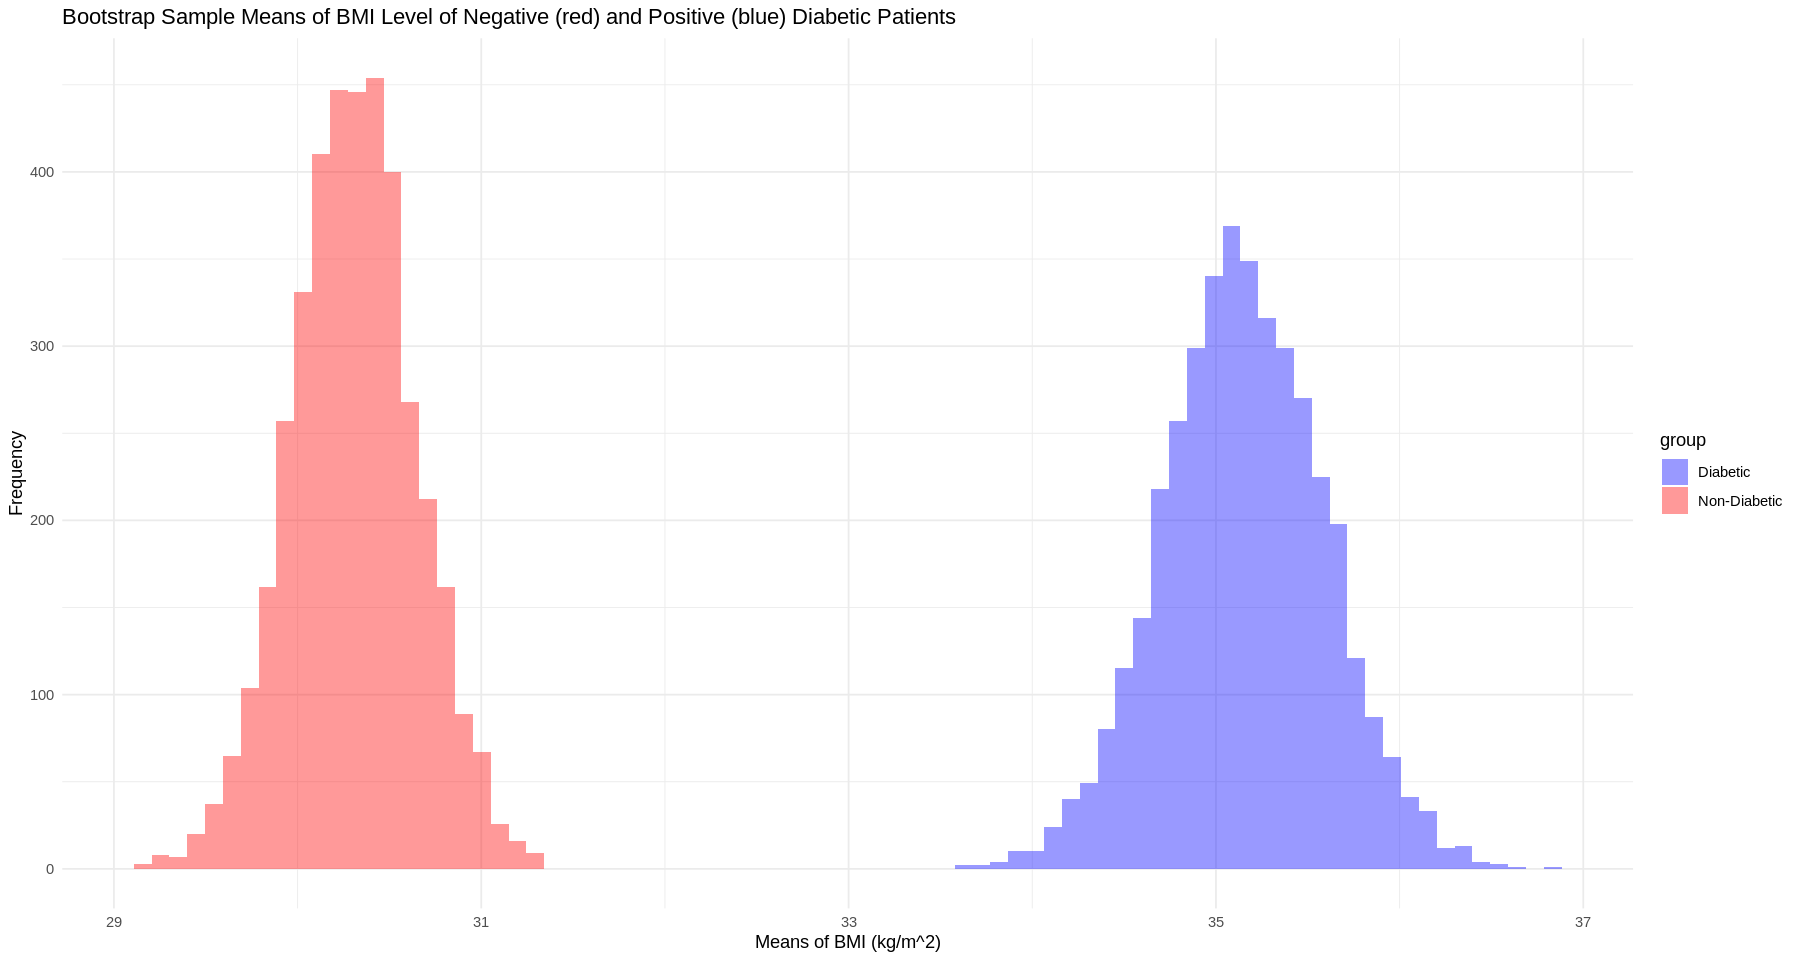

In [35]:
overlap_data <- data.frame(
    value = c(diabetes_positive_bootstrap_dist$stat, diabetes_negative_bootstrap_dist$stat),
    group = rep(c("Diabetic", "Non-Diabetic"), each = 4000))

overlap_plot <- overlap_data |>
ggplot(aes(x = value, fill = group)) +
  geom_histogram(position = "identity", bins = 80 , alpha = 0.4) +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  labs(title = "Bootstrap Sample Means of BMI Level of Negative (red) and Positive (blue) Diabetic Patients", 
       x = "Means of BMI (kg/m^2)", 
       y = "Frequency")


overlap_plot

# Methods - Plan
Our report's trustworthiness is founded on data sourced from the prestigious National Institute of Diabetes and Digestive and Kidney Diseases. This ensures that our findings are supported by reliable data. As stated above, we are exploring our data to see if there is a difference in BMI across the negative and positive examples. If there is a significant difference, we can infer from our data that those with a higher or lower BMI have or do not have diabetes.

Based on the two bootstrap distributions of sample means side-by-side and the mean shown above, we can clearly see that there is a relationsip between BMI and diabetes. Patients without diabetes seem to have a lower BMI on average compared to those with diabetes. Additionally, the second plot that includes both distributions shows no overlap, indicating a strong difference in the outcome of our random variable of interest across the two categories.

The findings above may lead one to conclude that a high BMI is directly tied to being diabetic. However, we could like to clarify that we are simply looking to determine if diabetics tend to have a higher BMI than their non-diabetic counterparts, and are not suggesting or claiming that a high BMI is a cause of diabetes. In other words, relationship is not causation.

Additionally, we've observed that the variability of BMI for diabetic patients is higher than non diabetic patience. This suggests that the BMI values for diabetic individuals deviate more from their average. Delving deeper, this heightened variability could imply a diverse health profile within the diabetic group.  It could imply that there are both diabetic people who control their illness successfully through healthy lifestyle choices and others who do not, resulting in a larger range of BMI readings. This substantial variability may also be symptomatic of a variety of factors influencing diabetic patients' BMI more distinctly than non-diabetic persons. Such factors could encompass diet, exercise,  genetic factors, and etc.


Adimittedly, while our bootstrap distributions of sample means visually suggest a pronounced difference in BMI between diabetics and non-diabetics among females of at least 21 years old of Pima Indian heritage, it's crucial not to draw conclusions based solely on these visuals. Since these are only bootstrap samples, they only provide us with sample statistics of the one sample taken from the original population, so we cannot defend our claim with confidence. A deeper statistical inference, rather than just a visual representation, is required to offer a solid foundation for any findings. Therefore, we will build confidence intervals for each group using both bootstrapping and CLT methods. A confidence interval will provide a range of plausible values for the true population mean, allowing us to assess the precision of our estimate and to make inferences about the population parameter. If the confidence intervals for the two groups do not overlap, this provides initial evidence that the means are significantly different.


**OUTCOME AND INFLUENCES:**

Furthermore, we must determine whether the difference in BMI is due to chance or due to a true difference in our random variable's outcome. We will conduct a hypothesis test to evaluate if there is sufficient evidence to support our claim. The null hypothesis will state that there is no difference in means of BMI between individuals diagnosed with diabetes and those without diabetes., while the alternative hypothesis will posit that there is a difference. A low p-value (typically less than 0.05) would lead us to reject the null hypothesis, providing statistical evidence of a difference in means.

If a notable difference in BMI between diabetics and non-diabetics is confirmed, it will enhance the understanding of the relationship between obesity and diabetes, even though this study doesn't establish causality. While existing studies has illuminated the linkage between obesity and diabetes, our investigation aims to strengthen this view by offering additional  evidence. Besides, given the increased risk of diabetes, medical professionals could emphasise preventive measures for people with higher BMIs. Moving forward, a future question could be to explore how the other variables in the dataset interact with `BMI` concerning diabetes. For instance, is there an interaction effect between `Age` and `BMI` in predicting diabetes?